In [2]:
import nbimporter
from Import_data import get_df_class, get_df_epigenomic, get_df_sequence, convertToNum, get_type_of_nucl_from_list_of_sequence

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.utils import to_categorical 
from itertools import product
sns.set(color_codes=True)

%matplotlib inline

problems = [['A-E','I-E']]
lines = ['GM12878','HelaS3','HepG2','K562']

#path
path_relazione = '../../relazione/img/'
path_output = '../output/'

In [17]:
problem = problems[0]
problem_slug = "_vs_".join(problem)
line = lines[0]
path_c = f'../data/classes/{line}_class.csv'
path_e = f'../data/epigenomic-data/{line}.csv'
path_s = f'../data/sequences/{line}.fa'

df_c = get_df_class(path_c)
df_e = get_df_epigenomic(path_e)
df_s = get_df_sequence(path_s)

# EDA su classi

In [5]:
df_c.describe()

class
count   223049
unique       7
top         UK
freq     80004

In [6]:
df_c.head()

class
0   A-E
1   A-E
2   A-E
3   A-E
4   A-E

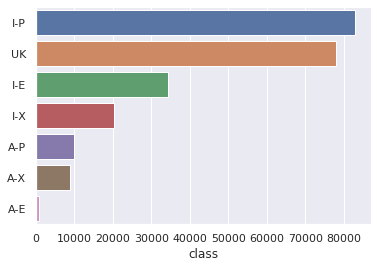

In [48]:
sns.set(font_scale=1)
sns.barplot(x=df_c['class'].value_counts(),y=df_c['class'].value_counts().index.values,orient='h')

# EDA su dati epigenomici

In [7]:
df_e.head()

ATF2  ATF3   BATF  BCL11A   BCL3  BCLAF1  BHLHE40  BRCA1  C-FOS(FOS)  \
0  7.46  3.67  16.20   20.02  28.27    9.01    13.74   2.31        2.39   
1  3.07  3.54   1.17    1.06   6.44    2.67     9.22   1.70        0.22   
2  3.45  0.86   2.21    3.46   4.35    2.10    22.07   1.63        0.87   
3  8.03  1.77   3.75    4.51   8.54    4.00    19.74   2.55        0.15   
4  2.89  1.15   1.06    2.39   4.21    3.64     7.43   2.32        0.69   

   C-MYC(MYC)  ...  USF1   USF2  WHIP(WRNIP1)   YY1  ZBTB33   ZEB1  ZNF143  \
0        6.30  ...  4.21   4.94          2.11  0.00    3.82  24.44    3.45   
1        8.30  ...  3.01   3.33          1.31  0.00    0.27   4.47    2.64   
2        8.65  ...  4.16  11.26          3.91  0.09    2.01   7.15    1.64   
3        3.25  ...  1.59   2.63          3.34  0.00    2.01   3.69    0.76   
4        5.45  ...  2.12   5.33          3.83  0.00    0.83   9.19    1.04   

   ZNF274  ZNF384  ZZZ3  
0    0.10    3.62  0.15  
1    0.02    1.01  0.00  
2    0.00    1.43  0.10  
3    0.00    7.21  0.00  
4    0.00    4.10  0.04  

[5 rows x 101 columns]

In [8]:
df_e.describe()

ATF2           ATF3           BATF         BCL11A  \
count  223049.000000  223049.000000  223049.000000  223049.000000   
mean        1.081205       1.067037       0.910783       0.986133   
std         1.610495       1.185601       1.759527       1.173531   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.380000       0.280000       0.310000       0.380000   
50%         0.680000       0.800000       0.630000       0.770000   
75%         1.120000       1.520000       1.070000       1.270000   
max        37.490000      40.890000      85.900000      58.200000   

                BCL3         BCLAF1        BHLHE40          BRCA1  \
count  223049.000000  223049.000000  223049.000000  223049.000000   
mean        1.157398       1.083511       1.060821       0.838814   
std         1.691762       1.065153       2.423607       1.123083   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.280000       0.460000       0.270000       0.370000   
50%         0.730000       0.850000       0.550000       0.700000   
75%         1.390000       1.360000       1.000000       1.110000   
max        62.530000      26.880000      78.540000      91.800000   

          C-FOS(FOS)     C-MYC(MYC)  ...           USF1           USF2  \
count  223049.000000  223049.000000  ...  223049.000000  223049.000000   
mean        0.674162       1.182654  ...       1.329388       0.960388   
std         0.992383       1.712709  ...       1.948617       1.925306   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         0.000000       0.250000  ...       0.460000       0.290000   
50%         0.390000       0.770000  ...       0.990000       0.640000   
75%         1.030000       1.520000  ...       1.700000       1.170000   
max        47.510000      61.440000  ...      56.320000     126.610000   

        WHIP(WRNIP1)            YY1         ZBTB33           ZEB1  \
count  223049.000000  223049.000000  223049.000000  223049.000000   
mean        0.854302       0.551228       0.958348       1.471804   
std         0.842123       0.729927       1.179068       2.440150   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.290000       0.000000       0.400000       0.000000   
50%         0.650000       0.300000       0.800000       0.860000   
75%         1.180000       0.840000       1.310000       1.940000   
max        22.810000      32.100000      48.910000     162.190000   

              ZNF143         ZNF274         ZNF384           ZZZ3  
count  223049.000000  223049.000000  223049.000000  223049.000000  
mean        0.771373       0.563365       0.804293       0.564000  
std         1.174013       0.563737       1.090890       0.538925  
min         0.000000       0.000000       0.000000       0.000000  
25%         0.280000       0.130000       0.330000       0.160000  
50%         0.540000       0.420000       0.650000       0.430000  
75%         0.930000       0.830000       1.050000       0.820000  
max        66.470000      18.170000      74.810000      25.480000  

[8 rows x 101 columns]

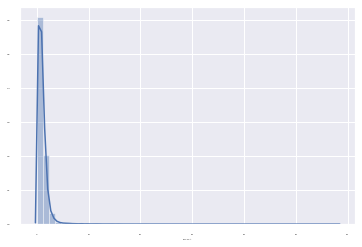

In [22]:
sns.distplot(df_e["BCL11A"],)

In [19]:
df = df_e.join(df_c)
df = df[df['class'].isin(problem)]
df.head()

ATF2  ATF3   BATF  BCL11A   BCL3  BCLAF1  BHLHE40  BRCA1  C-FOS(FOS)  \
0  7.46  3.67  16.20   20.02  28.27    9.01    13.74   2.31        2.39   
1  3.07  3.54   1.17    1.06   6.44    2.67     9.22   1.70        0.22   
2  3.45  0.86   2.21    3.46   4.35    2.10    22.07   1.63        0.87   
3  8.03  1.77   3.75    4.51   8.54    4.00    19.74   2.55        0.15   
4  2.89  1.15   1.06    2.39   4.21    3.64     7.43   2.32        0.69   

   C-MYC(MYC)  ...   USF2  WHIP(WRNIP1)   YY1  ZBTB33   ZEB1  ZNF143  ZNF274  \
0        6.30  ...   4.94          2.11  0.00    3.82  24.44    3.45    0.10   
1        8.30  ...   3.33          1.31  0.00    0.27   4.47    2.64    0.02   
2        8.65  ...  11.26          3.91  0.09    2.01   7.15    1.64    0.00   
3        3.25  ...   2.63          3.34  0.00    2.01   3.69    0.76    0.00   
4        5.45  ...   5.33          3.83  0.00    0.83   9.19    1.04    0.00   

   ZNF384  ZZZ3  class  
0    3.62  0.15    A-E  
1    1.01  0.00    A-E  
2    1.43  0.10    A-E  
3    7.21  0.00    A-E  
4    4.10  0.04    A-E  

[5 rows x 102 columns]

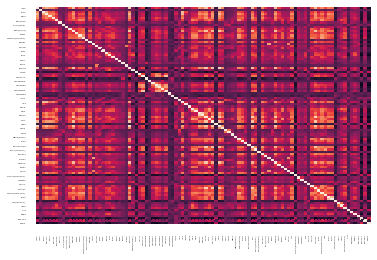

In [21]:
sns.set(font_scale=0.2)
plotted = sns.heatmap(df.corr(),cbar=False)
fig = plotted.get_figure()
fig.savefig(path_relazione + f'{line}_{problem_slug}_correlation_matrix.pdf')

# EDA su sequenze

In [10]:
df_s.head()

id                                                seq
0  chr1:1136806-1137006  GCCCGGGAGGAGCCGGAGACTCCGGAGACCCCGCCCAGAGCCCGCT...
1  chr1:1840542-1840742  ACCGCCCCGAGTCCGCGCGGCCTGCGAGCGCCGTCTGGTGGGAAAG...
2  chr1:2231838-2232038  GGGTCACACCAGAGGCAAGCGGTCGTAGCTGCTCTTCCCAGAGTAA...
3  chr1:2232562-2232762  CCCAGCCGGGCGTCCTCGGCCTTCTGTGCCTCTCGGGAGGGTCCGC...
4  chr1:2478446-2478646  CAGGGCGGGGCGTGGGCTGAGCAGCCCCTCCCATGGAGGGAGCGGC...

In [11]:
df_s.describe()

id  \
count                     223049   
unique                    222443   
top     chr5:140390470-140390670   
freq                          15   

                                                      seq  
count                                              223049  
unique                                             221965  
top     NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...  
freq                                                  271

# Divisione test train
Prova cnn su A-E e I-E

In [12]:
from sklearn.model_selection import train_test_split
random_state=42


In [13]:
df = df_c.join(df_s)
df_E = df[df["class"].isin(["A-E","I-E"])]
df_E = df_E.sample(frac=1).reset_index(drop=True)
df_E.head(20)

class                         id  \
0    I-E    chr21:11095841-11096041   
1    I-E  chr12:118278811-118279011   
2    I-E    chr17:15141419-15141619   
3    I-E   chr5:175930460-175930660   
4    I-E   chr5:142174261-142174461   
5    A-E     chr1:79215852-79216052   
6    I-E  chr11:112752261-112752461   
7    I-E   chr2:113583191-113583391   
8    A-E      chr12:6741510-6741710   
9    I-E    chr14:66335484-66335684   
10   I-E     chr4:73887376-73887576   
11   I-E   chr1:203622402-203622602   
12   I-E      chr12:6586865-6587065   
13   I-E    chr13:85779597-85779797   
14   I-E     chr3:17679957-17680157   
15   I-E      chr10:6634129-6634329   
16   I-E     chr3:38195561-38195761   
17   I-E    chr12:13662493-13662693   
18   I-E     chr1:61649945-61650145   
19   I-E   chr1:229296760-229296960   

                                                  seq  
0   CTATCAACAACAAGCTGAGTATAAAACAGCAGGAAAATGAAAACCA...  
1   AAAAAAAATTGCTAAGTAACATACCAATGTGGATGCAAATTATGGT...  
2   CTTGCATAATTAGTCATTTAACAGAGCCAGCAACCATCCAGGAGCT...  
3   CTGCAGAATCGCTTGAACCTGGGAGGCGGAGGTTGCAGTGAATGGA...  
4   GGGAGAGAGGGGACTGCCCCTGTTGGGACAGATGATAAGAAATGAA...  
5   CCTGATAAGAGGTCGAAACTGCAGAGAAATGAAAATGGGGATATCA...  
6   GGAAACGCCTAAAGGGAAGGGATTCATTAGCCTCGCTCTGCTGCCT...  
7   GCTCAGATCCAGGAATTGGAACCAAGGCTTTTGAACATTTTAATGC...  
8   GTTCTTACATCTCCCCATCCTCCTTGCCCCTGAGAATCAGCTCTGG...  
9   GATGTTGTCAGTGGGGCTGGACAACACTTTTGAGACACTTGGTTAC...  
10  GAAATGAATAAGTACAGACCCCCAAATTCACTATTTTGGTCTTTAA...  
11  CAGAAGAAAAGTTAGAAGCTAGCAGAGCTTGGTTCTTGAGGTTTAA...  
12  GCCCCCACCGGCCCCATGGCAGCCCCCGGGGCCCCAGCTGAGTACG...  
13  TAGCTCAGGGTTCGTGGATACACCAATCAGCACTCTGTATCTAGCC...  
14  ATTTCTCTGATAAAGCTAAAATTCTTATTTTCTGTGGAAGCAAATG...  
15  TAGAAGAAAGAATAAGTGAGATATTTCCATTTCTAGTGACAGGTGG...  
16  CCTTAATCAGATTTTGCAATAAGAAATTAGGCAGTGCCATGGGCAA...  
17  TGCCATGCAGAGGATTATACTGAAGTGAAATGATAGAGCATCTAAT...  
18  CTTACATGGCGGCTGTATTTACTCGGCCGCAGCCAATCAGCCGGCA...  
19  TTTTGACTCATTGTTTCACAAGTGCTCTGGTTATATTACATTTTTT...






# CNN A-I vs A-E su sequenze dna
* la one hot encoding deve essere normalizzata intorno a +1 -1 ? 
* di che forma deve essere il kernel ? padding ? un stride orizzontale =0 e verticale 2 ? 

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D,Conv2D, MaxPooling2D
from keras import losses
from keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
pd.DataFrame(y_train)[0].value_counts().plot(kind='barh')

'Number of active enhancer 891 | Number of inactive enahncer 8420 | 0.10581947743467933'

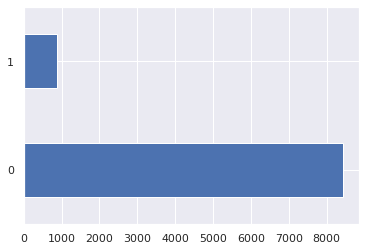

In [42]:
cae = sum(y_test==1)
cie = len(y_test) - cae
pd.DataFrame(y_test)[0].value_counts().plot(kind='barh') 
f'Number of active enhancer {cae} | Number of inactive enahncer {cie} | {cae/cie}' 

In [43]:
type_of_y = set(y_train)
num_of_diff_labels =  len(type_of_y)
f'{type_of_y} , {num_of_diff_labels}'

'{0, 1} , 2'

In [44]:
X_train.shape , y_train.shape

((21723, 200, 5), (21723,))

## Collezione

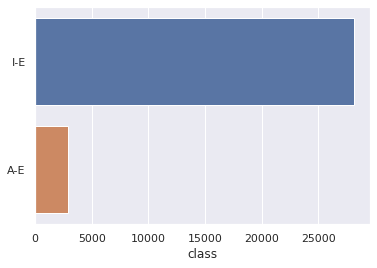

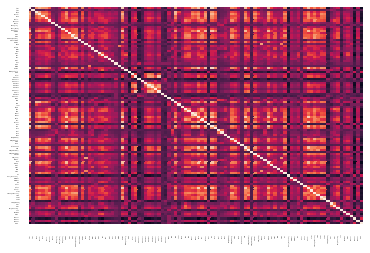

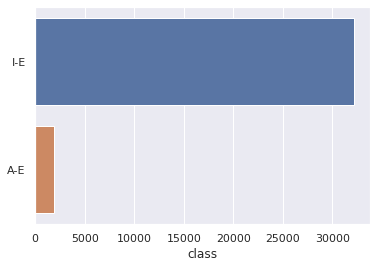

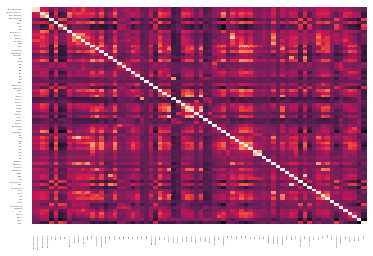

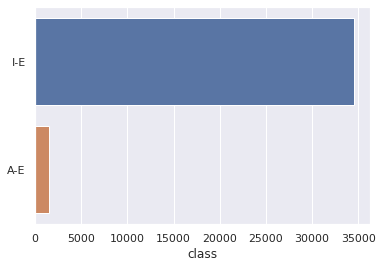

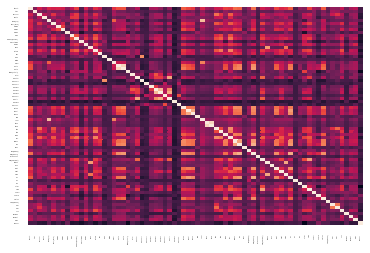

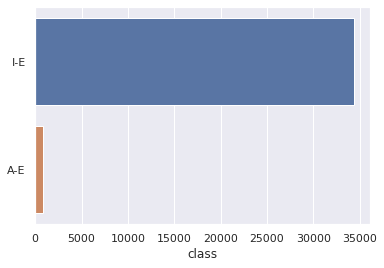

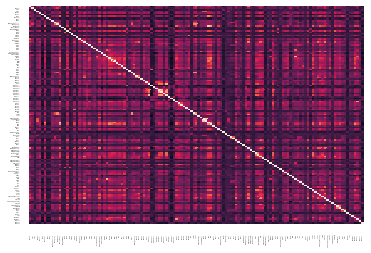

In [65]:
for nth, other in enumerate(product(lines,problems)):
    l, p = other
    problem_slug = "_vs_".join(p)
    path_c = f'../data/classes/{l}_class.csv'
    path_e = f'../data/epigenomic-data/{l}.csv'
    #path_s = f'../data/sequences/{l}.fa'
    #df_s = get_df_sequence(path_s)
    
    df_c = get_df_class(path_c)
    df_e = get_df_epigenomic(path_e)
    df = df_e.join(df_c)
    df = df[df['class'].isin(p)]
    
    count = df['class'].value_counts()
    
    plt.figure(nth*2 +1)
    sns.set(font_scale=1)
    sns.barplot(x=count,y=count.index.values,orient='h').get_figure().savefig(path_relazione + f'{l}_{problem_slug}_distribution_label.pdf')
    
    plt.figure(nth*2)
    sns.set(font_scale=0.13)
    del df['class']
    sns.heatmap(df.corr(),cbar=False).get_figure().savefig(path_relazione + f'{l}_{problem_slug}_correlation_matrix.pdf')